<a href="https://colab.research.google.com/github/marcilioduarte/br-python-challenges/blob/master/Houses_Regression_(Working_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Como utilizar um modelo de regressão linear para preencher dados nulos do preço de venda de imóveis:**

###**Introdução**


Esse projeto trata-se de um exercício de regressão linear da minha especialização na Awari que utilizei como base para construção de portfólio. 

Fiz a parte do tratamento dos dados em conjunto com meus colegas de turma @Érika Rocha e @Lucas Castro, mas a partir da etapa de definição das variáveis do modelo de regressão optamos por fazer sozinhos para treinar nossas habilidades. 

Os dados nos foram disponibilizados pelo nosso professor, @Anderson Cordeiro, e o objetivo principal do projeto é usar um modelo de regressão linear para estimar e substituir valores nulos do preço de venda dos imóveis da base que não tenham esta informação. 

###***Importando as bibliotecas e unindo os dados***

**Importando as bibliotecas que possivelmente iremos utilizar**

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

In [2]:
df_test=pd.read_csv('test.csv')

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
df_test=pd.read_csv('test.csv')

In [5]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


**Criando coluna no df de teste com a classificação de dados de treino/teste para utilizarmos na hora de unificar os dados**


In [6]:
df_test['istrain']=0
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,istrain
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


**Repetindo todo o processoa acima para os dados de treino**


In [7]:
df_train=pd.read_csv('train.csv')

In [8]:
df_train['istrain']=1
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,istrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


**Juntando as duas tabelas para fazer os demais tratamentos de uma vez só**

In [9]:
df=pd.concat([df_test,df_train],axis=0)
df.shape

(2919, 82)

### ***Análise Exploratória e Tratamentos Iniciais***

Tarefas que podem ser executadas nesta base:


1. Tratar os nulos e os valores de NAs que estão como nulos, mas que se tratam de categorias em variáveis categóricas.
2. Verificar se tem alguma variável com valores constantes com o .describe()
2. Verificar se tem alguma variável com categorias tipo que não correspondem com o esperado com o value_counts ou com o unique;
3. Criar as dummies ou categorias numéricas que forem necessárias em variáveis categóricas;

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### **Tratando os nulos das categorias em que NA é uma categoria.**

In [12]:
df['Alley'].fillna("no_access",inplace=True)
df['BsmtQual'].fillna('no_bsmt',inplace=True)
df['BsmtCond'].fillna('no_bsmt',inplace=True)
df['BsmtExposure'].fillna('no_bsmt',inplace=True)
df['BsmtFinType1'].fillna('no_bsmt',inplace=True)
df['BsmtFinType2'].fillna('no_bsmt',inplace=True)
df['Fireplaces'].fillna('no_fireplc',inplace=True)
df['GarageType'].fillna('no_garage',inplace=True)
df['GarageFinish'].fillna('no_garage',inplace=True)
df['GarageQual'].fillna('no_garage',inplace=True)
df['GarageCond'].fillna('no_garage',inplace=True)
df['PoolQC'].fillna('no_pool',inplace=True)
df['Fence'].fillna("no_fence",inplace=True)
df['MiscFeature'].fillna("none",inplace=True)


In [13]:
df['Alley'].value_counts()

no_access    2721
Grvl          120
Pave           78
Name: Alley, dtype: int64

In [14]:
##COLUNAS MARCILIO

df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual']].describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea
count,2919.00,2919.00,2433.00,2919.00,2919.00,2919.00,2919.00,2919.00,2896.00
mean,1460.00,57.14,69.31,10168.11,6.09,5.56,1971.31,1984.26,102.20
std,842.79,42.52,23.34,7887.00,1.41,1.11,30.29,20.89,179.33
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00
25%,730.50,20.00,59.00,7478.00,5.00,5.00,1953.50,1965.00,0.00
50%,1460.00,50.00,68.00,9453.00,6.00,5.00,1973.00,1993.00,0.00
75%,2189.50,70.00,80.00,11570.00,7.00,6.00,2001.00,2004.00,164.00
max,2919.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00


In [15]:
## Nenhuma delas tem constante porque o desvio padrão não foi igual a 0 em nenhum caso.

####**Outro exemplo de tratamento que poderia ser aplicado**

Como nosso objetivo principal neste exercício não é treinar a habilidade de tratar os dados (porque já fizemos isso em outros exercícios), fomos orientados a não perder muito tempo fazendo todos os tratamentos possíveis. 

Porém, abaixo há um modelo de tratamento que poderia ser adotado para todas as variáveis categóricas.

In [16]:
ls_sub= {'LotShape': {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}}
df_2=df.copy()
df_2=df.replace(ls_sub)
df_2[['LotShape']]

,LotShape
0,4
1,3
2,3
3,3
4,3
...,...
1455,4
1456,4
1457,4
1458,4


### ***Análise de Correlação para Regressão***

***Análise da correlação entre as variáveis que eu fiquei responsável e a variável dependente (saleprice)***

In [17]:
cm1=df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'SalePrice']].corr().round(2)

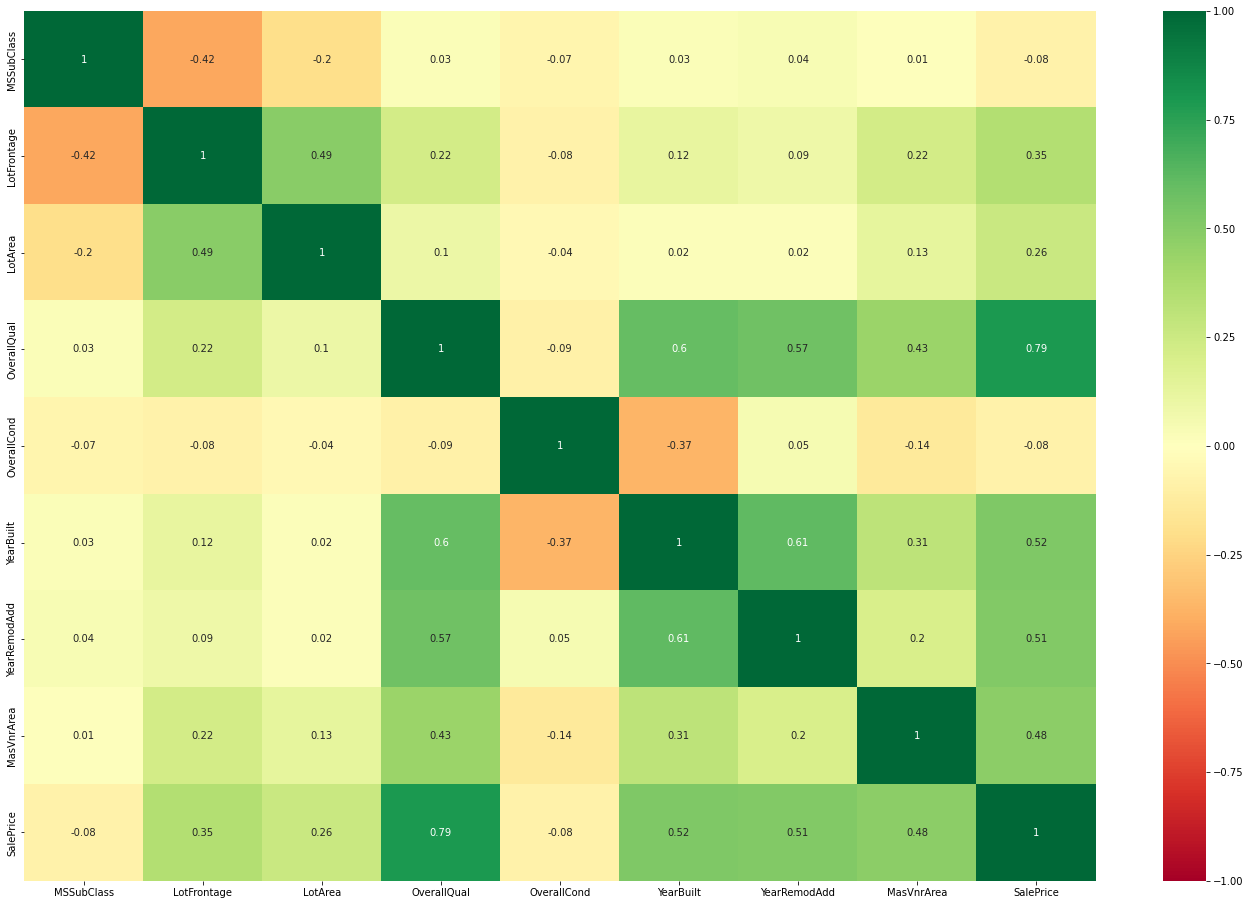

In [18]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(cm1, ax=ax, vmin=-1.0,vmax=1.0, annot=True,cmap='RdYlGn') 
plt.show()

**Análise da correlação unindo as minhas com as variáveis dos colegas**

In [19]:
cm2=df[[ 'SalePrice','MasVnrArea', 'LotFrontage', 'GarageYrBlt','OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']].corr().round(2)

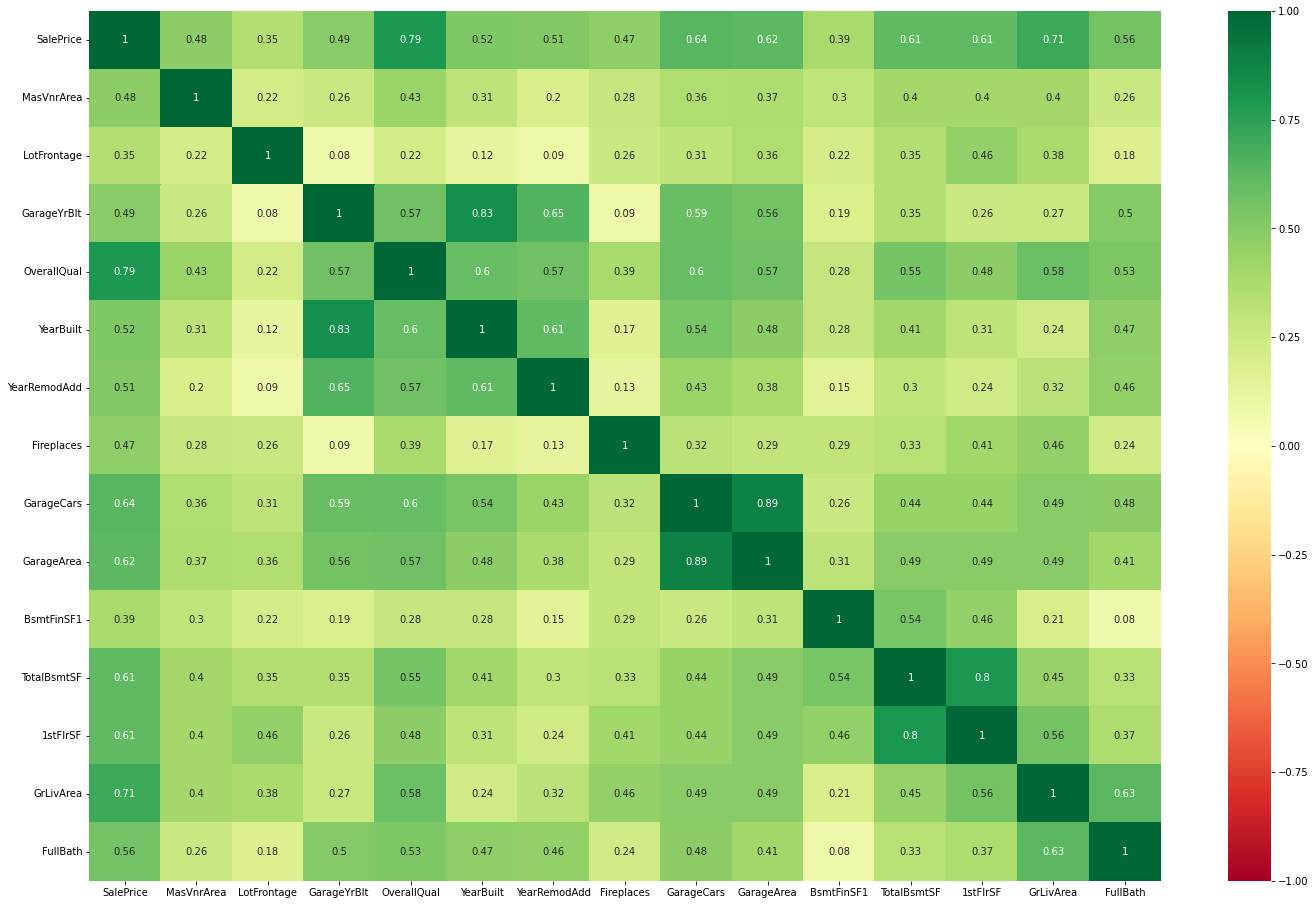

In [20]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(cm2, ax=ax, vmin=-1.0,vmax=1.0, annot=True,cmap='RdYlGn') 
plt.show()

### **Estimando o 'SalePrice' com base nas variáveis definidas pela análise de correlação**

####**Aplicando a regressão na tabela de treino**

Primeiro, vamos separar os dados de novo

In [21]:
df_test_2=df[df['istrain']==0]

In [22]:
df_train_2=df[df['istrain']==1]

In [23]:
df_train_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,istrain,SalePrice
0,1,60,RL,65.0,8450,Pave,no_access,Reg,Lvl,AllPub,...,no_pool,no_fence,none,0,2,2008,WD,Normal,1,208500.0
1,2,20,RL,80.0,9600,Pave,no_access,Reg,Lvl,AllPub,...,no_pool,no_fence,none,0,5,2007,WD,Normal,1,181500.0
2,3,60,RL,68.0,11250,Pave,no_access,IR1,Lvl,AllPub,...,no_pool,no_fence,none,0,9,2008,WD,Normal,1,223500.0
3,4,70,RL,60.0,9550,Pave,no_access,IR1,Lvl,AllPub,...,no_pool,no_fence,none,0,2,2006,WD,Abnorml,1,140000.0
4,5,60,RL,84.0,14260,Pave,no_access,IR1,Lvl,AllPub,...,no_pool,no_fence,none,0,12,2008,WD,Normal,1,250000.0


As variáveis explicativas escolhidas fazem parte do grupo de variáveis da matriz de correlação 2. Porém, a fim de simplificar o processo, optei por retirar variáveis com valores nulos.

In [24]:
lr=LinearRegression()
X=df_train_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']]
Y=df_train_2[['SalePrice']]

Vou separar para o teste 30% da amostra e para validação 70%, esse método é chamado de holdout e é bem aceito no meio corporativo. 70% da amostra irá passar pelo FIT e os outros 30% serão utilizados para teste. O random state irá fixar ou não um valor para o train, teste e split começar. 

In [25]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=42, test_size=0.3) 

Fitando o modelo de regressão linear com as variáveis explicativas e dependente de treino.

In [26]:
lr.fit(X_train,Y_train)

LinearRegression()

Criando uma matriz de estimativas do SalePrice com base na matriz das variáveis explicativas de validação.

In [27]:
Yhat=lr.predict(X_valid)

In [28]:
Yhat

array([[149329.20817408],
       [304507.82109333],
       [113937.26869998],
       [179644.60841616],
       [297971.06848695],
       [ 51654.09390535],
       [229800.17596515],
       [174576.18538435],
       [ 50145.72204022],
       [109802.73504659],
       [151691.88822251],
       [105512.70899166],
       [ 80119.50197208],
       [206704.95937333],
       [192443.30685741],
       [125033.88664334],
       [213679.30383118],
       [130834.89855487],
       [115416.396381  ],
       [222110.80372983],
       [181131.40758577],
       [220684.48595727],
       [178003.00780455],
       [112581.56053541],
       [209310.76234346],
       [168104.85050554],
       [197351.0227016 ],
       [ 84313.27426671],
       [187316.66673939],
       [207331.08794796],
       [121924.91084764],
       [262921.73502682],
       [194852.520505  ],
       [ 78391.36472204],
       [260376.31278255],
       [154928.71179429],
       [146451.64655545],
       [222125.8388882 ],
       [3028

Verificando os valores reais da variável dependente Y de validação

In [29]:
Y_valid

,SalePrice
892,154500.0
1105,325000.0
413,115000.0
522,159000.0
1036,315500.0
...,...
331,139000.0
323,126175.0
650,205950.0
439,110000.0


Importando as métricas e verificando a explicabilidade do meu modelo.

In [30]:
r2= r2_score(Y_valid,Yhat)
print('As variáveis explicativas do modelo explicam as variações no preço de venda dos imóveis em:',(r2*100).round(2),'%')

As variáveis explicativas do modelo explicam as variações no preço de venda dos imóveis em: 80.83 %


In [31]:
m_abe=mean_absolute_error(Y_valid,Yhat)
print('O erro médio absoluto do modelo é:', (m_abe).round(2))

O erro médio absoluto do modelo é: 24232.33


In [32]:
m_sqe=mean_squared_error(Y_valid,Yhat)
print('O erro médio quadrático do modelo é:', (m_sqe).round(2))

O erro médio quadrático do modelo é: 1337499031.46


In [33]:
m_sqe_sqrt=math.sqrt(m_sqe)
print('A raiz quadrada do erro médio quadrático é:', (m_sqe_sqrt))

A raiz quadrada do erro médio quadrático é: 36571.833854163844


1. Modelo A:

  *R2: 80,83%*

  *MAE: 24.232,33 UM*

  *MSE: 1.337.499.031,46 UM*

In [34]:
lr.coef_

array([[ 1.92568904e+04,  2.27841743e+02,  3.47997538e+02,
         9.61594675e+03,  1.50860924e+04,  5.37442854e+00,
         1.87733318e+01,  3.55529028e+00,  1.05877616e+01,
         4.13827981e+01, -1.58648955e+03]])

In [35]:
lr.intercept_

array([-1197139.32509137])

Salvando os resultados do melhor modelo com a biblioteca pickle

In [36]:
with open('LinearRegression.pkl', 'wb') as modelo:
  pickle.dump(lr,modelo) 

In [37]:
with open('LinearRegression.pkl', 'rb') as modelo:
  regressao=pickle.load(modelo)

In [38]:
regressao

LinearRegression()

####**Aplicando a regressão na tabela de teste**

Antes de mais nada, vamos verificar se há nulos nas variáveis explicativas para evitar problemas na hora de estimar a regressão

In [39]:
df_test_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   Fireplaces    1459 non-null   int64  
 4   GarageCars    1458 non-null   float64
 5   GarageArea    1458 non-null   float64
 6   BsmtFinSF1    1458 non-null   float64
 7   TotalBsmtSF   1458 non-null   float64
 8   1stFlrSF      1459 non-null   int64  
 9   GrLivArea     1459 non-null   int64  
 10  FullBath      1459 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 136.8 KB


As variáveis: 

1. 'GarageCars'

2. 'GarageArea'

3. 'BsmtFinSF1'

4. 'TotalBsmtSF'

Apresentam 1 observação com dados nulos.

Vamos substituir esses nulos por

In [40]:
df_test_2[['GarageCars','GarageArea', 'BsmtFinSF1','TotalBsmtSF']].mean().round(2)

GarageCars        1.77
GarageArea      472.77
BsmtFinSF1      439.20
TotalBsmtSF    1046.12
dtype: float64

In [41]:
df_test_2[['GarageCars','GarageArea', 'BsmtFinSF1','TotalBsmtSF']].median().round(2)

GarageCars       2.0
GarageArea     480.0
BsmtFinSF1     350.5
TotalBsmtSF    988.0
dtype: float64

Para me ajudar a decidir se substituo pela média ou mediana, vou plotar boxplots.

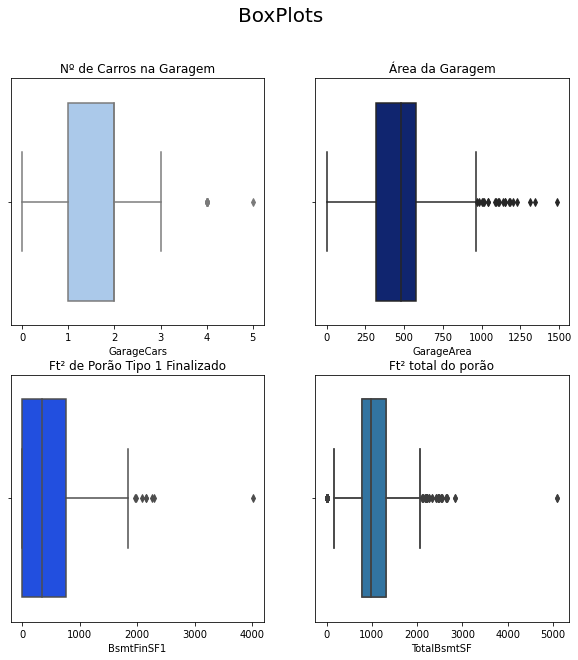

In [42]:
fig, axes =plt.subplots(2,2,figsize=[10,10])

sns.boxplot(data=df_test_2,x='GarageCars',ax=axes[0,0],palette='pastel').set_title('Nº de Carros na Garagem')
sns.boxplot(data=df_test_2, x='GarageArea',ax=axes[0,1],palette='dark').set_title('Área da Garagem')
sns.boxplot(data=df_test_2,x='BsmtFinSF1',ax=axes[1,0],palette='bright').set_title('Ft² de Porão Tipo 1 Finalizado')
sns.boxplot(data=df_test_2,x='TotalBsmtSF',ax=axes[1,1],palette='deep').set_title('Ft² total do porão')

fig.suptitle('BoxPlots',fontsize=20)

sns.boxplot(data=df_test_2,x=df_test_2['TotalBsmtSF'])
plt.show()

Ok, agora vamos fazer a substituição utilizando a mediana para diminuir o impacto de outliers nos nossos resultados

In [43]:
df_test_2['GarageCars'].fillna(df_test_2['GarageCars'].median(),inplace=True)
df_test_2['GarageArea'].fillna(df_test_2['GarageArea'].median(),inplace=True)
df_test_2['BsmtFinSF1'].fillna(df_test_2['BsmtFinSF1'].median(),inplace=True)
df_test_2['TotalBsmtSF'].fillna(df_test_2['TotalBsmtSF'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

Agora vamos verificar se deu certo, e caso funcione vamos estimar o Sale Price para o modelo com as variáveis explicativas da base de teste.

In [44]:
df_test_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   Fireplaces    1459 non-null   int64  
 4   GarageCars    1459 non-null   float64
 5   GarageArea    1459 non-null   float64
 6   BsmtFinSF1    1459 non-null   float64
 7   TotalBsmtSF   1459 non-null   float64
 8   1stFlrSF      1459 non-null   int64  
 9   GrLivArea     1459 non-null   int64  
 10  FullBath      1459 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 136.8 KB


In [45]:
X_2=df_test_2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 
              'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath']]

In [46]:
Yhat_2=regressao.predict(X_2).round(2)
Yhat_2

array([[104276.2 ],
       [152193.39],
       [184036.83],
       ...,
       [172557.54],
       [104610.97],
       [251931.48]])

Preços estimados, agora vamos incluí-los em uma nova variável na tabela e substituir os nulos da variável antiga pelos valores da variável nova.

In [47]:
df_test_2[['SalePrice_est']]=Yhat_2
df_test_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,istrain,SalePrice,SalePrice_est
0,1461,20,RH,80.0,11622,Pave,no_access,Reg,Lvl,AllPub,...,MnPrv,none,0,6,2010,WD,Normal,0,NaN,104276.20
1,1462,20,RL,81.0,14267,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,Gar2,12500,6,2010,WD,Normal,0,NaN,152193.39
2,1463,60,RL,74.0,13830,Pave,no_access,IR1,Lvl,AllPub,...,MnPrv,none,0,3,2010,WD,Normal,0,NaN,184036.83
3,1464,60,RL,78.0,9978,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,none,0,6,2010,WD,Normal,0,NaN,198846.05
4,1465,120,RL,43.0,5005,Pave,no_access,IR1,HLS,AllPub,...,no_fence,none,0,1,2010,WD,Normal,0,NaN,209716.79


In [48]:
df_test_2['SalePrice'].fillna(df_test_2['SalePrice_est'],inplace=True)
df_test_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,istrain,SalePrice,SalePrice_est
0,1461,20,RH,80.0,11622,Pave,no_access,Reg,Lvl,AllPub,...,MnPrv,none,0,6,2010,WD,Normal,0,104276.20,104276.20
1,1462,20,RL,81.0,14267,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,Gar2,12500,6,2010,WD,Normal,0,152193.39,152193.39
2,1463,60,RL,74.0,13830,Pave,no_access,IR1,Lvl,AllPub,...,MnPrv,none,0,3,2010,WD,Normal,0,184036.83,184036.83
3,1464,60,RL,78.0,9978,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,none,0,6,2010,WD,Normal,0,198846.05,198846.05
4,1465,120,RL,43.0,5005,Pave,no_access,IR1,HLS,AllPub,...,no_fence,none,0,1,2010,WD,Normal,0,209716.79,209716.79


### **Resultado Final**

Pronto, agora vamos unir as tabelas novamente e voa-lá

In [49]:
df_train_2['SalePrice_est']=np.nan
df_train_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,istrain,SalePrice,SalePrice_est
0,1,60,RL,65.0,8450,Pave,no_access,Reg,Lvl,AllPub,...,no_fence,none,0,2,2008,WD,Normal,1,208500.0,NaN
1,2,20,RL,80.0,9600,Pave,no_access,Reg,Lvl,AllPub,...,no_fence,none,0,5,2007,WD,Normal,1,181500.0,NaN
2,3,60,RL,68.0,11250,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,none,0,9,2008,WD,Normal,1,223500.0,NaN
3,4,70,RL,60.0,9550,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,none,0,2,2006,WD,Abnorml,1,140000.0,NaN
4,5,60,RL,84.0,14260,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,none,0,12,2008,WD,Normal,1,250000.0,NaN


In [50]:
df=pd.concat([df_test_2,df_train_2],axis=0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,istrain,SalePrice,SalePrice_est
0,1461,20,RH,80.0,11622,Pave,no_access,Reg,Lvl,AllPub,...,MnPrv,none,0,6,2010,WD,Normal,0,104276.20,104276.20
1,1462,20,RL,81.0,14267,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,Gar2,12500,6,2010,WD,Normal,0,152193.39,152193.39
2,1463,60,RL,74.0,13830,Pave,no_access,IR1,Lvl,AllPub,...,MnPrv,none,0,3,2010,WD,Normal,0,184036.83,184036.83
3,1464,60,RL,78.0,9978,Pave,no_access,IR1,Lvl,AllPub,...,no_fence,none,0,6,2010,WD,Normal,0,198846.05,198846.05
4,1465,120,RL,43.0,5005,Pave,no_access,IR1,HLS,AllPub,...,no_fence,none,0,1,2010,WD,Normal,0,209716.79,209716.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,no_access,Reg,Lvl,AllPub,...,no_fence,none,0,8,2007,WD,Normal,1,175000.00,NaN
1456,1457,20,RL,85.0,13175,Pave,no_access,Reg,Lvl,AllPub,...,MnPrv,none,0,2,2010,WD,Normal,1,210000.00,NaN
1457,1458,70,RL,66.0,9042,Pave,no_access,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,1,266500.00,NaN
1458,1459,20,RL,68.0,9717,Pave,no_access,Reg,Lvl,AllPub,...,no_fence,none,0,4,2010,WD,Normal,1,142125.00,NaN
